In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
raw1 = pd.read_csv('urazy.csv')

# CZ010 is code for Prague (NUTS) - googled - clean data
accid = raw1.copy()[(raw1['kraj'] == 'CZ010') | (raw1['kraj'] == 'CZ020')]
accid = accid.groupby('rok').agg({'hodnota': np.nanmean})
accid = pd.DataFrame(accid['hodnota'].replace('0.0', np.nan).dropna())
accid.reset_index(inplace = True)
accid['rok'] = accid['rok'].astype(int)

# CZ080 is code for Brno (NUTS) - googled - clean data
accidB = raw1.copy()[raw1['kraj'] == 'CZ080']
accidB = accidB.groupby('rok').agg({'hodnota': np.nanmean})
accidB = pd.DataFrame(accidB['hodnota'].replace('0.0', np.nan).dropna())
accidB.reset_index(inplace = True)
accidB['rok'] = accidB['rok'].astype(int)

# merge into one DF, rename cols
accid = accid.merge(accidB, on = 'rok', how = 'left')
accid.columns = ['year','accidents_P', 'accidents_B']

accid.head()


,year,accidents_P,accidents_B
0,2001,3506.000,2145.20
1,2002,3854.075,3742.25
2,2003,3963.125,3322.00
3,2004,3854.150,3620.05
4,2005,3711.825,3570.45


In [4]:
raw2 = pd.read_excel('unemployment.xlsx', sheet_name = 'DATA')

unempl = pd.DataFrame(raw2.copy().loc[[2,12, 24]])
unempl = unempl.T.reset_index()
unempl.columns = ['year', '1', '2', 'unempl_B'] 
unempl = unempl.drop(0)
pd.to_numeric(unempl['1'])
pd.to_numeric(unempl['2'])
unempl['unempl_P'] = unempl[["1", "2"]].mean(axis=1)
unempl.drop(['1','2'], axis = 1,inplace = True)
unempl['year'] = unempl['year'].astype(int)

unempl.head()

,year,unempl_B,unempl_P
1,1993,5.79282,3.907014
2,1994,6.43949,3.321246
3,1995,5.79582,3.186992
4,1996,5.18675,2.555543
5,1997,7.95679,3.075202


In [5]:
df = accid.merge(unempl, how = 'left', on = 'year')
df


,year,accidents_P,accidents_B,unempl_B,unempl_P
0,2001,3506.000000,2145.200000,14.2932,5.292974
1,2002,3854.075000,3742.250000,13.3171,4.274086
2,2003,3963.125000,3322.000000,14.7478,4.675677
3,2004,3854.150000,3620.050000,14.5481,4.639576
4,2005,3711.825000,3570.450000,13.8926,4.368334
5,2006,3928.650000,3837.050000,11.9848,3.670655
6,2007,4212.450000,3957.450000,8.48654,2.911200
7,2008,3086.400000,3823.800000,7.38533,2.248997
8,2009,2643.150000,3703.050000,9.67649,3.737085
9,2010,2430.400000,2484.500000,10.1556,4.497275


<IPython.core.display.Javascript object>


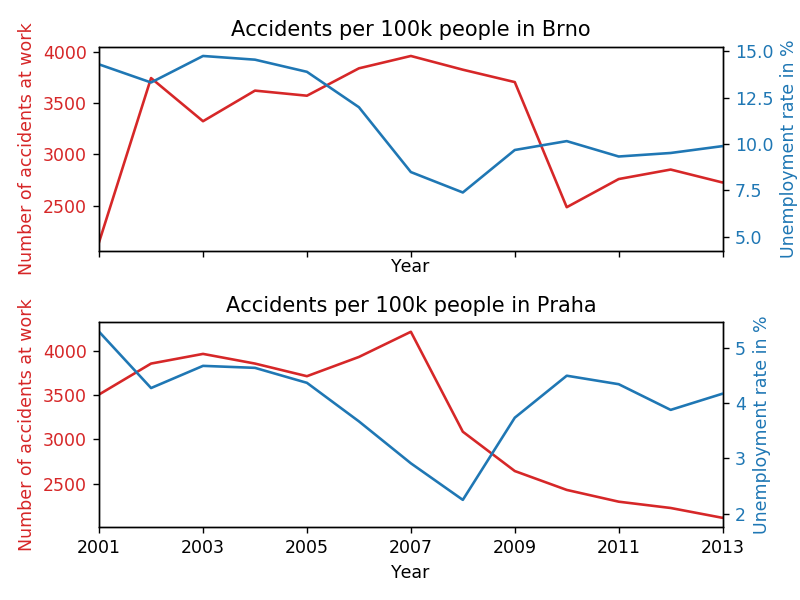

In [6]:
%matplotlib notebook
fig, axs = plt.subplots(2,1, sharex = True)

# PRAGUE PLOT
color = 'tab:red'
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Number of accidents at work', color=color)
axs[1].plot(df['year'], df['accidents_P'], color=color)
axs[1].tick_params(axis='y', labelcolor=color)
axs[1].set_title('Accidents per 100k people in Praha')
axs[1].set_xlim([2001,2013])

ax2 = axs[1].twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Unemployment rate in %', color=color)  # we already handled the x-label with ax1
ax2.plot(df['year'], df['unempl_P'] , color=color)
ax2.tick_params(axis='y', labelcolor=color)

# BRNO PLOT
color = 'tab:red'
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Number of accidents at work', color=color)
axs[0].plot(df['year'], df['accidents_B'], color=color)
axs[0].tick_params(axis='y', labelcolor=color)
axs[0].set_title('Accidents per 100k people in Brno')

ax4 = axs[0].twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax4.set_ylabel('Unemployment rate in %', color=color)  # we already handled the x-label with ax1
ax4.plot(df['year'], df['unempl_B'] , color=color)
ax4.tick_params(axis='y', labelcolor=color)

# plot settings global
plt.xticks(list(range(2001,2014, 2)), rotation = 45)
plt.xlim([2001,2013])
plt.tight_layout()
